In [1]:
import os
from google.cloud import bigquery
import pandas as pd


# ***I commented the following imports out but you will likely need at least some of them at some point***
#import matplotlib.pyplot as plt
#import numpy as np
#import scipy
#from scipy.stats import norm


# dont forget to replace <andreasfreund> with your local username
#os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "/Users/Rebecca/.config/gcloud/application_default_credentials.json"
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "/Users/Rebecca/.config/gcloud/application_default_credentials.json"
%load_ext google.cloud.bigquery
client = bigquery.Client()

print('Done!')

Done!


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import norm


In [3]:
testQuery = """
SELECT * 
FROM `broadband-data.mba_data.curr_httpgetmt` as httpmt
INNER JOIN `broadband-data.mba_data.unit-profile-sept2020` as mt ON httpmt.unit_id=mt.Unit_ID
Limit 5
"""

# Runs the query and converts it into a dataframe
testQueryDF = client.query(testQuery).to_dataframe()
print('Done!')

Done!


In [4]:
testQueryDF.head()

,unit_id,dtime,ddate,target,address,fetch_time,bytes_total,bytes_sec,bytes_sec_interval,warmup_time,...,Unit_ID_1,ISP,Technology,State,Census,timezone_offset,timezone_offset_dst,Download,Upload,Whitebox_Model
0,613972,2020-09-05 23:29:55+00:00,2020-09-05,samknows1.nyc2.level3.net,4.71.185.62,10000207,138606904,13860403,13860403,5000052,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600
1,613972,2020-09-06 11:28:32+00:00,2020-09-06,samknows1.nyc2.level3.net,4.71.185.62,10000148,144443792,14444165,14444165,1500080,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600
2,613972,2020-09-06 03:32:03+00:00,2020-09-06,samknows1.nyc2.level3.net,4.71.185.62,10000203,144375736,14437281,14437281,1500052,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600
3,613972,2020-09-06 07:26:55+00:00,2020-09-06,samknows1.nyc2.level3.net,4.71.185.62,10000171,144466960,14446449,14446449,5000085,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600
4,613972,2020-09-06 15:29:42+00:00,2020-09-06,samknows1.nyc2.level3.net,4.71.185.62,10000187,144449584,14444688,14444688,1500051,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600


In [5]:
%%bigquery
SELECT *
FROM `broadband-data.mba_data.curr_httpgetmt` as httpmt
INNER JOIN `broadband-data.mba_data.unit-profile-sept2020` as mt ON httpmt.unit_id=mt.Unit_ID
Limit 5

Downloading: 100%|██████████████████████████████| 5/5 [00:01<00:00,  3.19rows/s]


,unit_id,dtime,ddate,target,address,fetch_time,bytes_total,bytes_sec,bytes_sec_interval,warmup_time,...,Unit_ID_1,ISP,Technology,State,Census,timezone_offset,timezone_offset_dst,Download,Upload,Whitebox_Model
0,613972,2020-09-05 23:29:55+00:00,2020-09-05,samknows1.nyc2.level3.net,4.71.185.62,10000207,138606904,13860403,13860403,5000052,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600
1,613972,2020-09-06 11:28:32+00:00,2020-09-06,samknows1.nyc2.level3.net,4.71.185.62,10000148,144443792,14444165,14444165,1500080,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600
2,613972,2020-09-06 03:32:03+00:00,2020-09-06,samknows1.nyc2.level3.net,4.71.185.62,10000203,144375736,14437281,14437281,1500052,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600
3,613972,2020-09-06 07:26:55+00:00,2020-09-06,samknows1.nyc2.level3.net,4.71.185.62,10000171,144466960,14446449,14446449,5000085,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600
4,613972,2020-09-06 15:29:42+00:00,2020-09-06,samknows1.nyc2.level3.net,4.71.185.62,10000187,144449584,14444688,14444688,1500051,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600


In [6]:
%%bigquery test
SELECT * 
FROM `broadband-data.mba_data.curr_httpgetmt` as httpmt
INNER JOIN `broadband-data.mba_data.unit-profile-sept2020` as mt ON httpmt.unit_id=mt.Unit_ID
Limit 5

Downloading: 100%|██████████████████████████████| 5/5 [00:01<00:00,  3.19rows/s]


In [7]:
# Note that I saved the above query to a variable named test. See what it does below by running this cell
test.head()

,unit_id,dtime,ddate,target,address,fetch_time,bytes_total,bytes_sec,bytes_sec_interval,warmup_time,...,Unit_ID_1,ISP,Technology,State,Census,timezone_offset,timezone_offset_dst,Download,Upload,Whitebox_Model
0,613972,2020-09-05 23:29:55+00:00,2020-09-05,samknows1.nyc2.level3.net,4.71.185.62,10000207,138606904,13860403,13860403,5000052,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600
1,613972,2020-09-06 11:28:32+00:00,2020-09-06,samknows1.nyc2.level3.net,4.71.185.62,10000148,144443792,14444165,14444165,1500080,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600
2,613972,2020-09-06 03:32:03+00:00,2020-09-06,samknows1.nyc2.level3.net,4.71.185.62,10000203,144375736,14437281,14437281,1500052,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600
3,613972,2020-09-06 07:26:55+00:00,2020-09-06,samknows1.nyc2.level3.net,4.71.185.62,10000171,144466960,14446449,14446449,5000085,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600
4,613972,2020-09-06 15:29:42+00:00,2020-09-06,samknows1.nyc2.level3.net,4.71.185.62,10000187,144449584,14444688,14444688,1500051,...,613972,Optimum,Cable,NY,Northeast,-5,-4,100.0,35.0,wdr3600


<AxesSubplot:xlabel='ISP'>

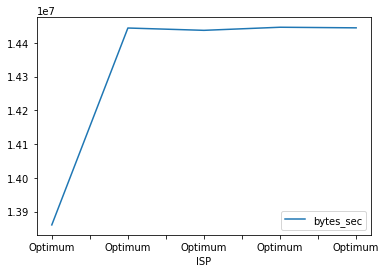

In [8]:
# Sample chart (this is not actually meaningful but shows how you can plot stuff)
test.plot(x = 'ISP', y = 'bytes_sec')

## National deployment data: Num of blocks that have deployment 

In [9]:
%%bigquery num_2015_nation_table
SELECT count(distinct BlockCode) as num_2015_nation
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2015_v5`
where consumer = 1 and StateAbbr !='AK' and StateAbbr !='HI' and MaxAdDown >= 25 and MaxAdUp >= 3

Downloading: 100%|██████████████████████████████| 1/1 [00:01<00:00,  1.65s/rows]


In [10]:
num_2015_nation_table

,num_2015_nation
0,5803476


In [11]:
%%bigquery num_2016_nation_table
SELECT count(distinct BlockCode) as num_2016_nation
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2016_v4`
where consumer = 1 and StateAbbr !='AK' and StateAbbr !='HI' and MaxAdDown >= 25 and MaxAdUp >= 3

Downloading: 100%|██████████████████████████████| 1/1 [00:01<00:00,  1.48s/rows]


In [12]:
num_2016_nation_table

,num_2016_nation
0,6237057


In [13]:
%%bigquery num_2017_nation_table
SELECT count(distinct BlockCode) as num_2017_nation
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2017_v3`
where consumer = 1 and StateAbbr !='AK' and StateAbbr !='HI' and MaxAdDown >= 25 and MaxAdUp >= 3

Downloading: 100%|██████████████████████████████| 1/1 [00:01<00:00,  1.60s/rows]


In [14]:
num_2017_nation_table

,num_2017_nation
0,6660284


In [15]:
type(num_2017_nation_table)

pandas.core.frame.DataFrame

In [16]:
%%bigquery num_2018_nation_table
SELECT count(distinct BlockCode) as num_2018_nation
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2018_v1`
where consumer = 1 and StateAbbr !='AK' and StateAbbr !='HI' and MaxAdDown >= 25 and MaxAdUp >= 3

Downloading: 100%|██████████████████████████████| 1/1 [00:01<00:00,  1.52s/rows]


In [17]:
num_2018_nation_table

,num_2018_nation
0,7000076


In [18]:
%%bigquery num_2019_nation_table
SELECT count(distinct BlockCode) as num_2019_nation
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2019_v2`
where consumer = 1 and StateAbbr !='AK' and StateAbbr !='HI' and MaxAdDown >= 25 and MaxAdUp >= 3

Downloading: 100%|██████████████████████████████| 1/1 [00:01<00:00,  1.74s/rows]


In [19]:
num_2019_nation_table

,num_2019_nation
0,7459404


In [20]:
%%bigquery num_2020_nation_table
SELECT count(distinct BlockCode) as num_2020_nation
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2020_v1`
where consumer = 1 and StateAbbr !='AK' and StateAbbr !='HI' and MaxAdDown >= 25 and MaxAdUp >= 3

Downloading: 100%|██████████████████████████████| 1/1 [00:01<00:00,  1.37s/rows]


In [21]:
num_2020_nation_table

,num_2020_nation
0,7942631


In [22]:
%%bigquery num_2021_nation_table
SELECT count(distinct BlockCode) as num_2021_nation
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2021_v1`
where consumer = 1 and StateAbbr !='AK' and StateAbbr !='HI' and MaxAdDown >= 25 and MaxAdUp >= 3

Downloading: 100%|██████████████████████████████| 1/1 [00:01<00:00,  1.62s/rows]


In [23]:
num_2021_nation_table

,num_2021_nation
0,8530032


In [24]:
# Todo: Combine the above 7 years data and make a nation level plot of num of blocks that have deployment. 

In [25]:
num_2015_nation_table['num']=num_2015_nation_table['num_2015_nation']
num_2016_nation_table['num']=num_2016_nation_table['num_2016_nation']
num_2017_nation_table['num']=num_2017_nation_table['num_2017_nation']
num_2018_nation_table['num']=num_2018_nation_table['num_2018_nation']
num_2019_nation_table['num']=num_2019_nation_table['num_2019_nation']
num_2020_nation_table['num']=num_2020_nation_table['num_2020_nation']
num_2021_nation_table['num']=num_2021_nation_table['num_2021_nation']

nation_df = pd.concat([num_2015_nation_table,num_2016_nation_table,num_2017_nation_table,num_2018_nation_table,num_2019_nation_table,num_2020_nation_table,num_2021_nation_table])
nation_df['Year'] = ["2015","2016","2017","2018","2019","2020","2021"]
nation_df = nation_df[['num',"Year"]]
nation_df


,num,Year
0,5803476,2015
0,6237057,2016
0,6660284,2017
0,7000076,2018
0,7459404,2019
0,7942631,2020
0,8530032,2021


Text(0.5, 0, 'Year')

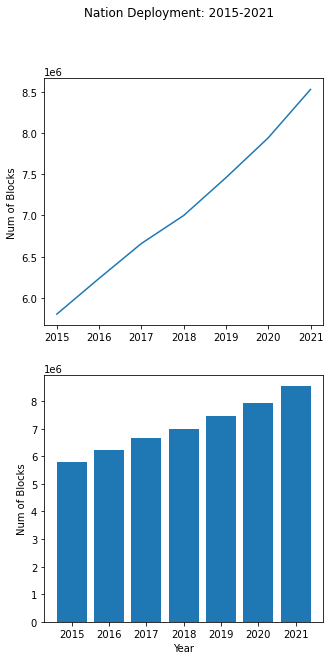

In [26]:
fig, axs = plt.subplots(2,figsize=(5,10))
fig.suptitle('Nation Deployment: 2015-2021')
axs[0].plot(nation_df['Year'], nation_df['num'])
axs[0].set_ylabel("Num of Blocks")
axs[1].bar(nation_df['Year'], nation_df['num'])
axs[1].set_ylabel("Num of Blocks")
axs[1].set_xlabel("Year")

## State level data: deployment rate change 

In [27]:
%%bigquery state_deployed_block_nums
SELECT a.StateAbbr, num_2018_state, num_2019_state,num_2020_state,num_2021_state
FROM

(SELECT StateAbbr, count(distinct BlockCode) as num_2018_state
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2018_v1`
where consumer = 1 and StateAbbr !='AK' and StateAbbr !='HI' and MaxAdDown >= 25 and MaxAdUp >= 3
group by StateAbbr) as a
join (
SELECT StateAbbr, count(distinct BlockCode) as num_2019_state
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2019_v2`
where consumer = 1 and StateAbbr !='AK' and StateAbbr !='HI' and MaxAdDown >= 25 and MaxAdUp >= 3
group by StateAbbr
) as b on a.StateAbbr = b.StateAbbr
join (
SELECT StateAbbr, count(distinct BlockCode) as num_2020_state
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2020_v1`
where consumer = 1 and StateAbbr !='AK' and StateAbbr !='HI' and MaxAdDown >= 25 and MaxAdUp >= 3
group by StateAbbr
) as c on a.StateAbbr = c.StateAbbr
join (
SELECT StateAbbr, count(distinct BlockCode) as num_2021_state
FROM `broadband-data.fcc_form_477.fbd_us_without_satellite_jun2021_v1`
where consumer = 1 and StateAbbr !='AK' and StateAbbr !='HI' and MaxAdDown >= 25 and MaxAdUp >= 3
group by StateAbbr
) as d on a.StateAbbr = d.StateAbbr



Downloading: 100%|████████████████████████████| 49/49 [00:01<00:00, 28.59rows/s]


In [53]:
state_deployed_block_nums.head()

,StateAbbr,num_2018_state,num_2019_state,num_2020_state,num_2021_state
0,FL,361602,359196,363689,365987
1,ME,43178,43871,44650,54995
2,MI,218731,238297,239500,254826
3,WI,175305,177929,183234,199157
4,OR,100959,104488,116025,123100


In [58]:
%%bigquery states_block_level_num
SELECT State_Abbr,Number_of_2010_Census_Blocks
FROM `broadband-data.fcc_form_477.State_Block_Counts_including_Abbr`

Downloading: 100%|████████████████████████████| 51/51 [00:01<00:00, 30.67rows/s]


In [59]:
states_block_level_num

,State_Abbr,Number_of_2010_Census_Blocks
0,NY,350169
1,FL,484481
2,MN,259777
3,VT,32580
4,OR,196621
5,DE,24115
6,SD,88360
7,WA,195574
8,TN,240116
9,MO,343565


In [60]:
state_deployed_block_nums

,StateAbbr,num_2018_state,num_2019_state,num_2020_state,num_2021_state
0,FL,361602,359196,363689,365987
1,ME,43178,43871,44650,54995
2,MI,218731,238297,239500,254826
3,WI,175305,177929,183234,199157
4,OR,100959,104488,116025,123100
5,NC,233379,236421,232925,243364
6,MO,210573,235538,254704,274331
7,TN,158393,159976,165656,182943
8,IN,199705,217318,229819,242586
9,OH,288168,308290,319410,333134


In [61]:
df = pd.merge(states_block_level_num, state_deployed_block_nums, how='inner', left_on = 'State_Abbr', right_on = 'StateAbbr')
df.head()

,State_Abbr,Number_of_2010_Census_Blocks,StateAbbr,num_2018_state,num_2019_state,num_2020_state,num_2021_state
0,NY,350169,NY,291911,304160,294548,301518
1,FL,484481,FL,361602,359196,363689,365987
2,MN,259777,MN,185845,195479,218032,230018
3,VT,32580,VT,16902,17257,17622,22788
4,OR,196621,OR,100959,104488,116025,123100


In [62]:
# State level deployment rate

df['2018 deployement rate'] = df.num_2018_state/df.Number_of_2010_Census_Blocks
df['2019 deployement rate'] = df.num_2019_state/df.Number_of_2010_Census_Blocks
df['2020 deployement rate'] = df.num_2020_state/df.Number_of_2010_Census_Blocks
df['2021 deployement rate'] = df.num_2021_state/df.Number_of_2010_Census_Blocks

In [63]:
df

,State_Abbr,Number_of_2010_Census_Blocks,StateAbbr,num_2018_state,num_2019_state,num_2020_state,num_2021_state,2018 deployement rate,2019 deployement rate,2020 deployement rate,2021 deployement rate
0,NY,350169,NY,291911,304160,294548,301518,0.833629,0.868609,0.84116,0.861064
1,FL,484481,FL,361602,359196,363689,365987,0.74637,0.741404,0.750678,0.755421
2,MN,259777,MN,185845,195479,218032,230018,0.715402,0.752488,0.839304,0.885444
3,VT,32580,VT,16902,17257,17622,22788,0.518785,0.529681,0.540884,0.699448
4,OR,196621,OR,100959,104488,116025,123100,0.51347,0.531418,0.590095,0.626078
5,DE,24115,DE,19010,18755,18477,19124,0.788306,0.777732,0.766204,0.793033
6,SD,88360,SD,61525,70483,82148,83759,0.696299,0.79768,0.929697,0.947929
7,WA,195574,WA,139858,141313,141048,143482,0.715116,0.722555,0.7212,0.733646
8,TN,240116,TN,158393,159976,165656,182943,0.659652,0.666245,0.6899,0.761894
9,MO,343565,MO,210573,235538,254704,274331,0.612906,0.68557,0.741356,0.798484


So state with the least deployment rate is XX and with the most deployment rate is XX. Deployment rate is calculated by the number of census blocks which have broadband deployed in the state devided by total number of census blocks in that state. 

Let's see their deployment rates change over recent years. 

In [66]:
# TODO: 画折线图！
print(len(df))
print(df.StateAbbr.nunique())
df.head()

49
49


,State_Abbr,Number_of_2010_Census_Blocks,StateAbbr,num_2018_state,num_2019_state,num_2020_state,num_2021_state,2018 deployement rate,2019 deployement rate,2020 deployement rate,2021 deployement rate
0,NY,350169,NY,291911,304160,294548,301518,0.833629,0.868609,0.84116,0.861064
1,FL,484481,FL,361602,359196,363689,365987,0.74637,0.741404,0.750678,0.755421
2,MN,259777,MN,185845,195479,218032,230018,0.715402,0.752488,0.839304,0.885444
3,VT,32580,VT,16902,17257,17622,22788,0.518785,0.529681,0.540884,0.699448
4,OR,196621,OR,100959,104488,116025,123100,0.51347,0.531418,0.590095,0.626078


In [94]:
df2=df[['StateAbbr',"2018 deployement rate","2019 deployement rate","2020 deployement rate","2021 deployement rate"]]
df2=df2.T

In [95]:
new_header = df2.iloc[0] 
df2 = df2[1:] 
df2.columns = new_header

In [96]:
df2.head()
#df2['Year']=df2['StateAbbr']
#df2['Year']=['2018','2019','2020','2021']


StateAbbr,NY,FL,MN,VT,OR,DE,SD,WA,TN,MO,...,NV,SC,OH,AL,NH,OK,WI,MI,CA,WY
2018 deployement rate,0.833629,0.74637,0.715402,0.518785,0.51347,0.788306,0.696299,0.715116,0.659652,0.612906,...,0.445894,0.670553,0.788758,0.58388,0.649139,0.450843,0.692642,0.663052,0.722571,0.395457
2019 deployement rate,0.868609,0.741404,0.752488,0.529681,0.531418,0.777732,0.79768,0.722555,0.666245,0.68557,...,0.425193,0.673005,0.843835,0.589572,0.653992,0.53944,0.70301,0.722364,0.77612,0.423171
2020 deployement rate,0.84116,0.750678,0.839304,0.540884,0.590095,0.766204,0.929697,0.7212,0.6899,0.741356,...,0.511214,0.691652,0.874272,0.598646,0.658087,0.643257,0.72397,0.726011,0.798403,0.478052
2021 deployement rate,0.861064,0.755421,0.885444,0.699448,0.626078,0.793033,0.947929,0.733646,0.761894,0.798484,...,0.581928,0.740253,0.911837,0.636844,0.717837,0.751659,0.786883,0.772469,0.823564,0.588128


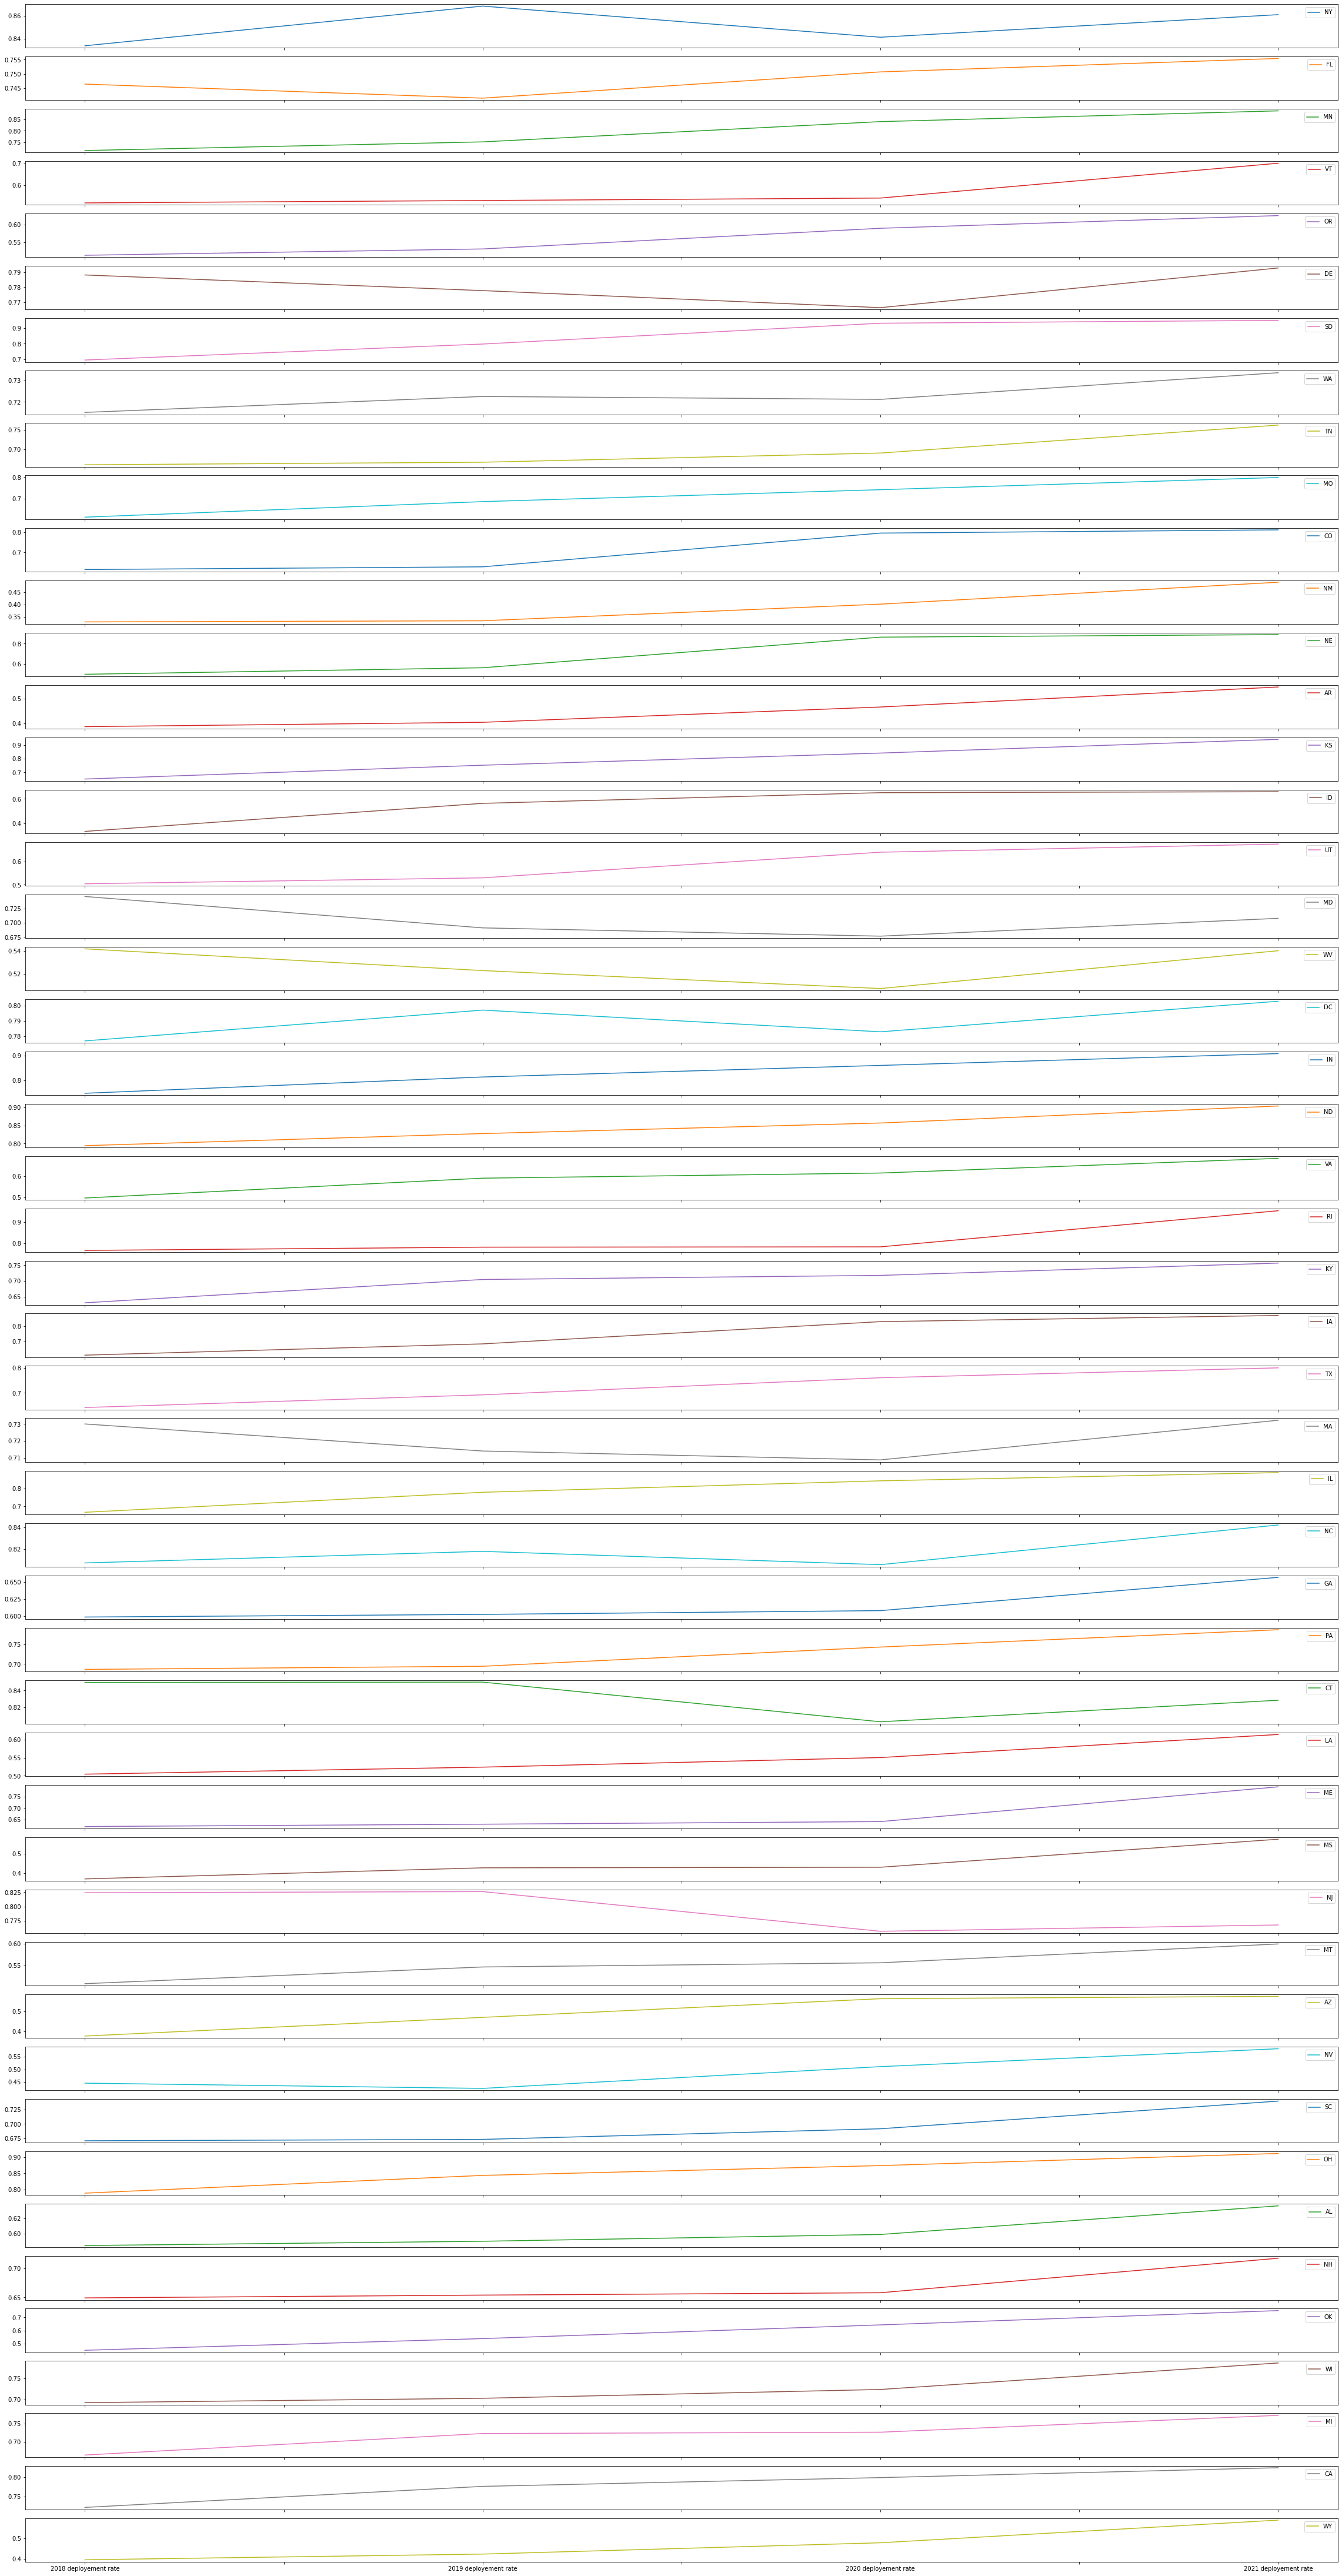

In [98]:
df2.plot(subplots=True, figsize=(40,80)); plt.legend(loc='best')

In [99]:
import plotly.express as px

In [101]:
#2018
fig = px.choropleth(df,
                    locations='StateAbbr', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='2018 deployement rate',
                    color_continuous_scale="Viridis_r", 
                    
                    )
fig.show()

In [102]:
#2019
fig = px.choropleth(df,
                    locations='StateAbbr', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='2019 deployement rate',
                    color_continuous_scale="Viridis_r", 
                    
                    )
fig.show()

In [103]:
#2020
fig = px.choropleth(df,
                    locations='StateAbbr', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='2020 deployement rate',
                    color_continuous_scale="Viridis_r", 
                    
                    )
fig.show()

In [104]:
#2021
fig = px.choropleth(df,
                    locations='StateAbbr', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='2021 deployement rate',
                    color_continuous_scale="Viridis_r", 
                    
                    )
fig.show()

### Satet with the Highest and Lowest Deployment Rate in 2021

In [106]:
df.loc[df['2021 deployement rate'].idxmax()]

State_Abbr                            RI
Number_of_2010_Census_Blocks       25181
StateAbbr                             RI
num_2018_state                     19274
num_2019_state                     19658
num_2020_state                     19696
num_2021_state                     23984
2018 deployement rate           0.765418
2019 deployement rate           0.780668
2020 deployement rate           0.782177
2021 deployement rate           0.952464
Name: 23, dtype: object

In [107]:
df.loc[df['2021 deployement rate'].idxmin()]

State_Abbr                            NM
Number_of_2010_Census_Blocks      168609
StateAbbr                             NM
num_2018_state                     55609
num_2019_state                     56389
num_2020_state                     67790
num_2021_state                     82824
2018 deployement rate            0.32981
2019 deployement rate           0.334436
2020 deployement rate           0.402054
2021 deployement rate           0.491219
Name: 11, dtype: object

In [120]:
df3=df[['StateAbbr',"2018 deployement rate","2019 deployement rate","2020 deployement rate","2021 deployement rate"]]
df3.rename(columns={'2018 deployement rate': '2018', '2019 deployement rate': '2019',
                   '2020 deployement rate':'2020','2021 deployement rate':'2021'}, inplace=True)

/var/folders/f6/cw8ncfy124b8_ngrxb3g5bw40000gn/T/ipykernel_34606/3642516701.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [122]:
df_RI = df3.loc[df3['2021'].idxmax()]


In [123]:
new_header = df_RI.iloc[0] 
df_RI = df_RI[1:] 
df_RI.columns = new_header

In [124]:
df_RI=df_RI.to_frame()
df_RI

,23
2018,0.765418
2019,0.780668
2020,0.782177
2021,0.952464


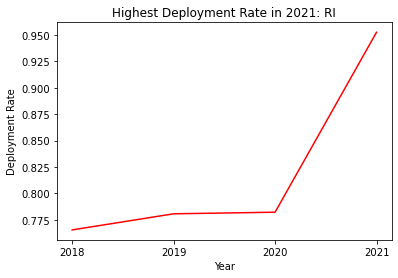

In [125]:
plt.plot(df_RI, color='red')
plt.xlabel('Year')
plt.ylabel('Deployment Rate') 
  
plt.title("Highest Deployment Rate in 2021: RI")
  
plt.show() 

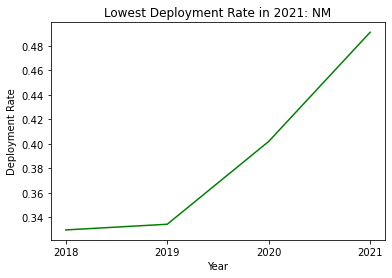

In [127]:
df_NM = df3.loc[df3['2021'].idxmin()]
new_header = df_NM.iloc[0] 
df_NM = df_NM[1:] 
df_NM.columns = new_header
df_NM=df_NM.to_frame()
plt.plot(df_NM, color='green')
plt.xlabel('Year')
plt.ylabel('Deployment Rate') 
  
plt.title("Lowest Deployment Rate in 2021: NM")
  
plt.show() 